# CHALLENGE TELECOM #1

`INTRODUCCIÓN`

**Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto *"Churn de Clientes"*. La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

Librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#📌 Extracción

Carga de datos desde la API

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

#data

Conversión de los datos a un DataFrame

In [3]:
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

Con el siguiente diccionario, tenemos una forma más clara de entender la estructura de los datos.

**DICCIONARIO DE DATOS**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Observamos que  en las columnas 'customer', 'phone', 'internet' y 'account' contienen diccionarios, por lo que hay que tratarlos.

In [5]:
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Verificamos la información del banco de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [7]:
df.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Comprobación de inconsistencias en los datos

- Valores duplicados

In [8]:
df.duplicated().sum()

0

- Valores nulos

In [9]:
df.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

- Valores únicos de cada columna

In [11]:
for col in df.columns:
    print(f"Los valores únicos de la columna '{col}' son en total: {df[col].nunique()}")
    print(f"Valores únicos de la columna '{col}': {df[col].unique()}\n")

Los valores únicos de la columna 'customerID' son en total: 7267
Valores únicos de la columna 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Los valores únicos de la columna 'Churn' son en total: 3
Valores únicos de la columna 'Churn': ['No' 'Yes' '']

Los valores únicos de la columna 'customer.gender' son en total: 2
Valores únicos de la columna 'customer.gender': ['Female' 'Male']

Los valores únicos de la columna 'customer.SeniorCitizen' son en total: 2
Valores únicos de la columna 'customer.SeniorCitizen': [0 1]

Los valores únicos de la columna 'customer.Partner' son en total: 2
Valores únicos de la columna 'customer.Partner': ['Yes' 'No']

Los valores únicos de la columna 'customer.Dependents' son en total: 2
Valores únicos de la columna 'customer.Dependents': ['Yes' 'No']

Los valores únicos de la columna 'customer.tenure' son en total: 73
Valores únicos de la columna 'customer.tenure': [ 9  4 13  3 71 63  7 65 54 72  5 56 34 

- Valores en blanco ('espacios')

In [12]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

- Eliminación de valores vacíos en columna *'Churn'* debido a que no sabemos con claridad si es *'Yes'* o *'No'*

In [13]:
df = df[df['Churn'].astype(str).str.strip() != '']
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- Manejo de valores vacíos en la columna *'account.Charges.Total'*

In [14]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


In [14]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Creación de la columna de "Cuentas_Diarias"

In [15]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [16]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Estandarización y transformación de datos

De las columnas con valores 'Yes' y 'No', procederemos a analizarlas.

In [17]:
to_binary_list = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in to_binary_list:
    print(f"De la columna {col}, los valores únicos: {df[col].unique()}")

De la columna Churn, los valores únicos: ['No' 'Yes']
De la columna customer.Partner, los valores únicos: ['Yes' 'No']
De la columna customer.Dependents, los valores únicos: ['Yes' 'No']
De la columna phone.PhoneService, los valores únicos: ['Yes' 'No']
De la columna phone.MultipleLines, los valores únicos: ['No' 'Yes' 'No phone service']
De la columna internet.OnlineSecurity, los valores únicos: ['No' 'Yes' 'No internet service']
De la columna internet.OnlineBackup, los valores únicos: ['Yes' 'No' 'No internet service']
De la columna internet.DeviceProtection, los valores únicos: ['No' 'Yes' 'No internet service']
De la columna internet.TechSupport, los valores únicos: ['Yes' 'No' 'No internet service']
De la columna internet.StreamingTV, los valores únicos: ['Yes' 'No' 'No internet service']
De la columna internet.StreamingMovies, los valores únicos: ['No' 'Yes' 'No internet service']
De la columna account.PaperlessBilling, los valores únicos: ['Yes' 'No']


Observamos que los valores únicos de estas columnas existen un valor más a parte de *'Yes'* o *'No'*, por lo que hay que tratarlos.

In [18]:
for col in to_binary_list:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df.dtypes

customerID                    object
Churn                          int64
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner               int64
customer.Dependents            int64
customer.tenure                int64
phone.PhoneService             int64
phone.MultipleLines            int64
internet.InternetService      object
internet.OnlineSecurity        int64
internet.OnlineBackup          int64
internet.DeviceProtection      int64
internet.TechSupport           int64
internet.StreamingTV           int64
internet.StreamingMovies       int64
account.Contract              object
account.PaperlessBilling       int64
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
Cuentas_Diarias              float64
dtype: object

In [19]:
for col in to_binary_list:
    print(f"De la columna {col}, los valores únicos: {df[col].unique()}")

De la columna Churn, los valores únicos: [0 1]
De la columna customer.Partner, los valores únicos: [1 0]
De la columna customer.Dependents, los valores únicos: [1 0]
De la columna phone.PhoneService, los valores únicos: [1 0]
De la columna phone.MultipleLines, los valores únicos: [0 1]
De la columna internet.OnlineSecurity, los valores únicos: [0 1]
De la columna internet.OnlineBackup, los valores únicos: [1 0]
De la columna internet.DeviceProtection, los valores únicos: [0 1]
De la columna internet.TechSupport, los valores únicos: [1 0]
De la columna internet.StreamingTV, los valores únicos: [1 0]
De la columna internet.StreamingMovies, los valores únicos: [0 1]
De la columna account.PaperlessBilling, los valores únicos: [1 0]


In [20]:
df.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Renombre de columnas para una mayor claridad

In [21]:
nuevos_titulos = ['Customer_ID', 'Churn', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billings', 'Payment_Method', 'Charges_Monthly', 'Charges_Total', 'Charges_Daily']

# Renombrar las columnas
df.columns = nuevos_titulos
df.head()

,Customer_ID,Churn,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billings,Payment_Method,Charges_Monthly,Charges_Total,Charges_Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

**Análisis Descriptivo**

In [22]:
df.describe()

,Churn,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Paperless_Billings,Charges_Monthly,Charges_Total,Charges_Daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [23]:
df.dtypes

Customer_ID            object
Churn                   int64
Gender                 object
Senior_Citizen          int64
Partner                 int64
Dependents              int64
Tenure                  int64
Phone_Service           int64
Multiple_Lines          int64
Internet_Service       object
Online_Security         int64
Online_Backup           int64
Device_Protection       int64
Tech_Support            int64
Streaming_TV            int64
Streaming_Movies        int64
Contract               object
Paperless_Billings      int64
Payment_Method         object
Charges_Monthly       float64
Charges_Total         float64
Charges_Daily         float64
dtype: object

**Distribución de evasión**

Realizamos una visualización de la evasión de clientes que se encuentran activos y no activos.

In [24]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

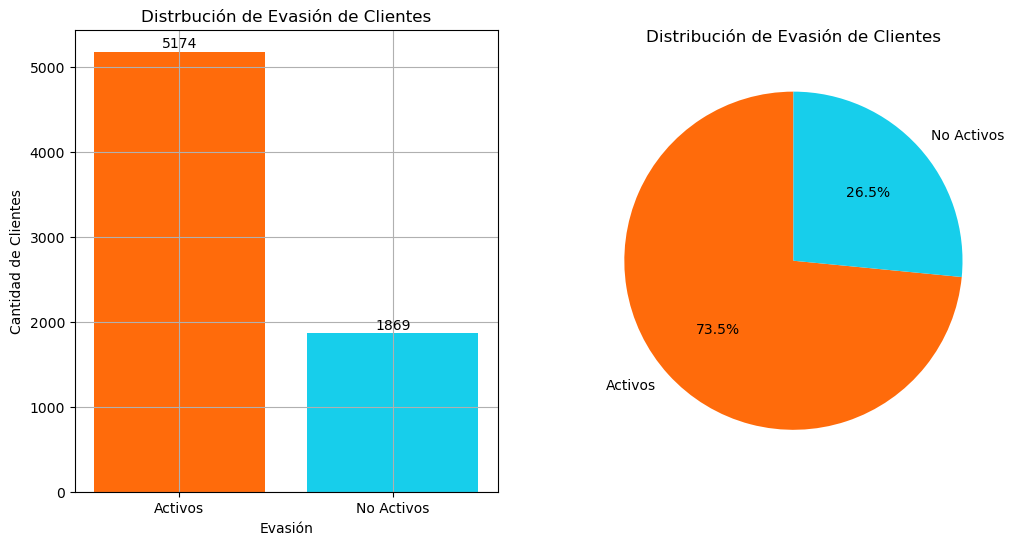

In [25]:
co = ['#FF6B0B', '#17CEEB']

# Gráfico de barras
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

values = df['Churn'].value_counts().values
indices = df['Churn'].value_counts().index
labels = ['Activos', 'No Activos']

axs[0].bar(indices, values, color=co)
axs[0].set_title('Distrbución de Evasión de Clientes')
axs[0].set_xticks([0, 1], labels=labels)
axs[0].set_ylabel('Cantidad de Clientes')
axs[0].set_xlabel('Evasión')
axs[0].grid()

for i, j in zip(indices, values):
    axs[0].text(i, j + 10, str(j), ha='center', va='bottom')

axs[1].pie(values, labels = labels, colors = co , autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribución de Evasión de Clientes')

plt.show()

**Recuento de evasión por variables categóricas**

Análisis de cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

- Distribución por género

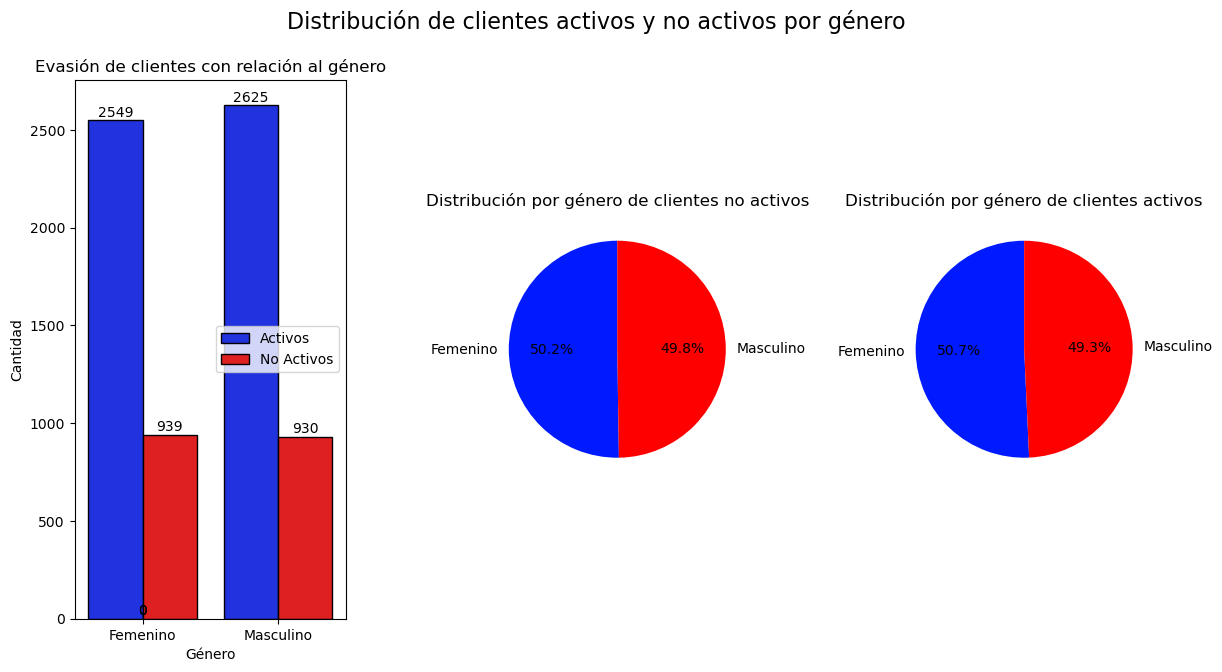

In [26]:
# Color rojo y azul
colours = ['#001AFF', "#FF0000"]
gender_labels = ['Femenino', 'Masculino']
fig, axs = plt.subplots(1, 3, figsize=(14, 7))

fig.suptitle('Distribución de clientes activos y no activos por género ', fontsize=16)
# Ajustar especios entre gráficas
plt.subplots_adjust(wspace=0.5)

sns.countplot(data=df, x=df['Gender'], hue=df['Churn'], ax=axs[0], palette=colours, edgecolor='black')
axs[0].set_title("Evasión de clientes con relación al género")
axs[0].set_xlabel("Género")
axs[0].set_ylabel("Cantidad")
axs[0].legend(labels=labels)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(gender_labels)

for p in axs[0].patches:
    axs[0].text(p.get_x() + p.get_width()/2., p.get_height() + 5, 
                str(int(p.get_height())), 
                ha='center', va='bottom')

# Gráfica de pastel de No activos con relación al género
churn_by_gender = df[df['Churn'] == 1]['Gender'].value_counts()

axs[1].pie(churn_by_gender.values, 
           labels=gender_labels, 
           colors=colours, 
           autopct='%1.1f%%', 
           startangle=90)
axs[1].set_title('Distribución por género de clientes no activos')

# Gráfica de pastel de activos con relación al género
actives_by_gender = df[df['Churn'] == 0]['Gender'].value_counts()

axs[2].pie(actives_by_gender.values, 
           labels=gender_labels, 
           colors=colours, 
           autopct='%1.1f%%', 
           startangle=90)
axs[2].set_title('Distribución por género de clientes activos')


plt.show()

- Por tipo de contrato

In [27]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

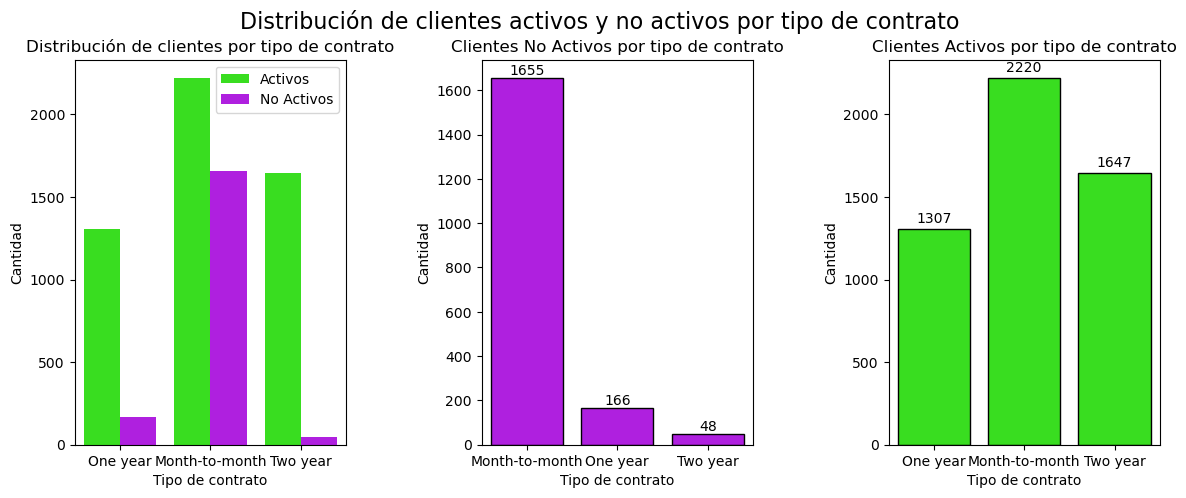

In [28]:
colours2 = ["#22FC00", "#BF00FF"]

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle('Distribución de clientes activos y no activos por tipo de contrato', fontsize=16)
plt.subplots_adjust(wspace=0.5)

sns.countplot(data=df, x=df['Contract'], hue=df['Churn'], ax=axs[0], palette=colours2)
axs[0].set_title("Distribución de clientes por tipo de contrato")
axs[0].set_xlabel("Tipo de contrato")
axs[0].set_ylabel("Cantidad")
axs[0].legend(labels=['Activos', 'No Activos'])


# Gráfica de barras de no activos por tipo de contrato
no_activos = df[df['Churn'] == 1]
sns.countplot(data=no_activos, x='Contract', ax=axs[1], color=colours2[1], edgecolor='black')
axs[1].set_title("Clientes No Activos por tipo de contrato")
axs[1].set_xlabel("Tipo de contrato")
axs[1].set_ylabel("Cantidad")

# Agregar totales
for p in axs[1].patches:
    axs[1].text(p.get_x() + p.get_width()/2., p.get_height() + 2, 
                str(int(p.get_height())), 
                ha='center', va='bottom')

 
# Gráfico de solo clientes activos por tipo de contrato
activos = df[df['Churn'] == 0]
sns.countplot(data=activos, x='Contract', ax=axs[2], color=colours2[0], edgecolor='black')
axs[2].set_title("Clientes Activos por tipo de contrato")
axs[2].set_xlabel("Tipo de contrato")
axs[2].set_ylabel("Cantidad")

# Agregar totales
for p in axs[2].patches:
    axs[2].text(p.get_x() + p.get_width()/2., p.get_height() + 20, 
                str(int(p.get_height())), 
                ha='center', va='bottom')


- Por Método de Pago

In [29]:
df['Payment_Method'].value_counts()

Payment_Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

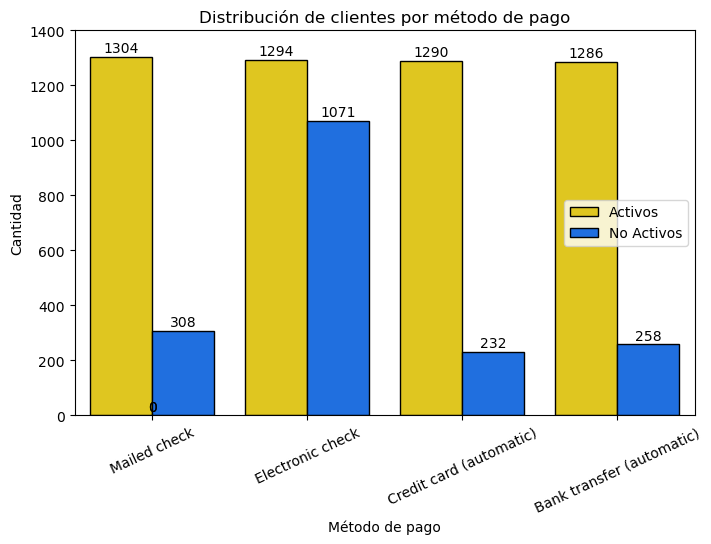

In [30]:
colours3 =["#FFDD00", "#006AFF"]
fig, axs = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(wspace=0.5, hspace=.7)

# Gráfico de barras de pago
sns.countplot(data=df, x='Payment_Method', hue='Churn', ax=axs, palette=colours3, edgecolor='black')
axs.set_title("Distribución de clientes por método de pago")
axs.set_xlabel("Método de pago")
axs.set_ylabel("Cantidad")
axs.legend(labels=labels)
axs.tick_params(axis='x', rotation=25)
y_lim = 1400
axs.set_ylim(0, y_lim)

# Agregar totales a las barras
for p in axs.patches:
    axs.text(p.get_x() + p.get_width()/2., p.get_height() + 5, 
                str(int(p.get_height())), 
                ha='center', va='bottom')
    
plt.show()

- Edad mayor o igual a 65 años

In [31]:
df['Senior_Citizen'].value_counts()

Senior_Citizen
0    5901
1    1142
Name: count, dtype: int64

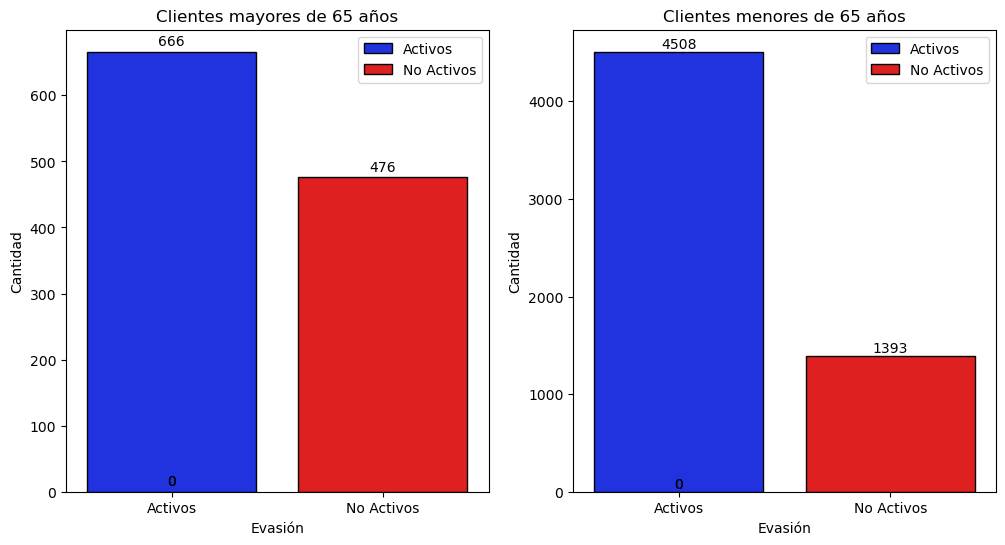

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras de clientes mayores de 65 años
axs[0].set_title('Clientes mayores de 65 años')
mayores_65 = df[df['Senior_Citizen'] == 1]

sns.countplot(data=mayores_65, x='Churn', hue = df['Churn'], ax=axs[0], palette=colours, edgecolor='black')
axs[0].set_xlabel('Evasión')
axs[0].set_ylabel('Cantidad')
axs[0].legend(labels=labels)
axs[0].set_xticks([0, 1], labels=labels)

for p in axs[0].patches:
    axs[0].text(p.get_x() + p.get_width()/2., p.get_height() + 5, 
                str(int(p.get_height())), 
                ha='center', va='bottom')

# Gráfico de clientes menores de 65 años
menores_65 = df[df['Senior_Citizen'] == 0]

sns.countplot(data=menores_65, x='Churn', hue = df['Churn'], ax=axs[1], palette=colours, edgecolor='black')
axs[1].set_title('Clientes menores de 65 años')
axs[1].set_xlabel('Evasión')
axs[1].set_ylabel('Cantidad')
axs[1].legend(labels=labels)
axs[1].set_xticks([0, 1], labels=labels)

for p in axs[1].patches:
    axs[1].text(p.get_x() + p.get_width()/2., p.get_height() + 5, 
                str(int(p.get_height())), 
                ha='center', va='bottom')

plt.show()

- Por pareja

In [33]:
df['Partner'].value_counts()

Partner
0    3641
1    3402
Name: count, dtype: int64

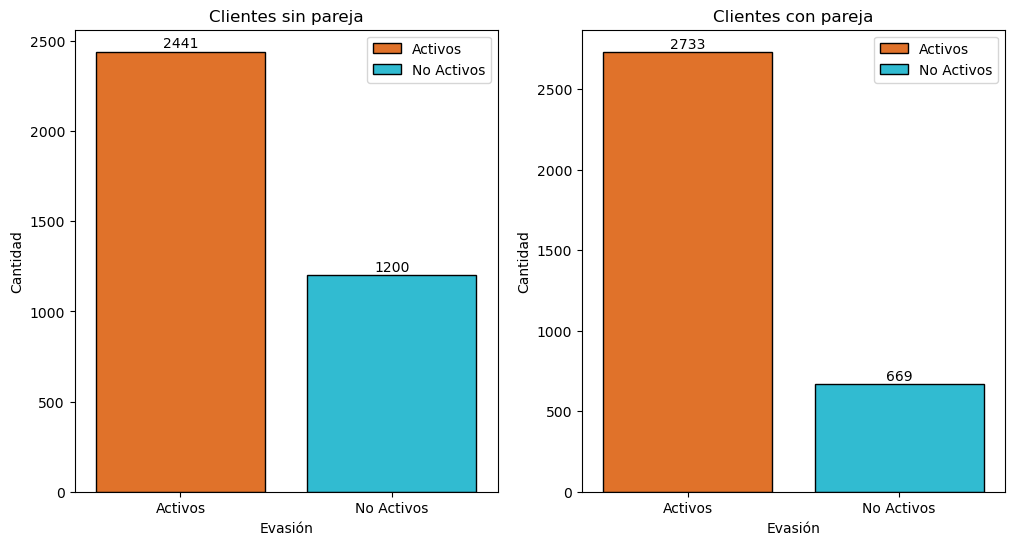

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica no tienen pareja
axs[0].set_title('Clientes sin pareja')
no_pareja = df[df['Partner'] == 0]

sns.countplot(data=no_pareja, x='Churn', hue='Churn', ax=axs[0], palette=co, edgecolor='black', legend=False)
axs[0].set_xlabel('Evasión')
axs[0].set_ylabel('Cantidad')
axs[0].legend(labels=labels)
axs[0].set_xticks([0, 1], labels=labels)

for p in axs[0].patches:
    axs[0].text(p.get_x() + p.get_width()/2., p.get_height() + 5, 
                str(int(p.get_height())), 
                ha='center', va='bottom')

# Gráfica con pareja
pareja = df[df['Partner'] == 1]

sns.countplot(data=pareja, x='Churn', hue='Churn', ax=axs[1], palette=co, edgecolor='black', legend=False)
axs[1].set_title('Clientes con pareja')
axs[1].set_xlabel('Evasión')
axs[1].set_ylabel('Cantidad')
axs[1].legend(labels=labels)
axs[1].set_xticks([0, 1], labels=labels)

for p in axs[1].patches:
    axs[1].text(p.get_x() + p.get_width()/2., p.get_height() + 5, 
                str(int(p.get_height())), 
                ha='center', va='bottom')

plt.show()

- Suscrpciones

    `PhoneService`: suscripción al servicio telefónico<br>
    `MultipleLines`: suscripción a más de una línea telefónica<br>
    `InternetService`: suscripción a un proveedor de internet<br>
    `OnlineSecurity`: suscripción adicional de seguridad en línea<br>
    `OnlineBackup`: suscripción adicional de respaldo en línea<br>
    `DeviceProtection`: suscripción adicional de protección del dispositivo<br>
    `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera<br>
    `StreamingTV`: suscripción de televisión por cable<br>
    `StreamingMovies`: suscripción de streaming de películas

In [35]:
print(df.columns)

Index(['Customer_ID', 'Churn', 'Gender', 'Senior_Citizen', 'Partner',
       'Dependents', 'Tenure', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Contract', 'Paperless_Billings', 'Payment_Method', 'Charges_Monthly',
       'Charges_Total', 'Charges_Daily'],
      dtype='object')


In [36]:
df_suscription = df[['Churn', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies']]

df_suscription.head()

,Churn,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,0,1,0,DSL,0,1,0,1,1,0
1,0,1,1,DSL,0,0,0,0,0,1
2,1,1,0,Fiber optic,0,0,1,0,0,0
3,1,1,0,Fiber optic,0,1,1,0,1,1
4,1,1,0,Fiber optic,0,0,0,1,1,0


In [37]:
df_suscription.shape

(7043, 10)

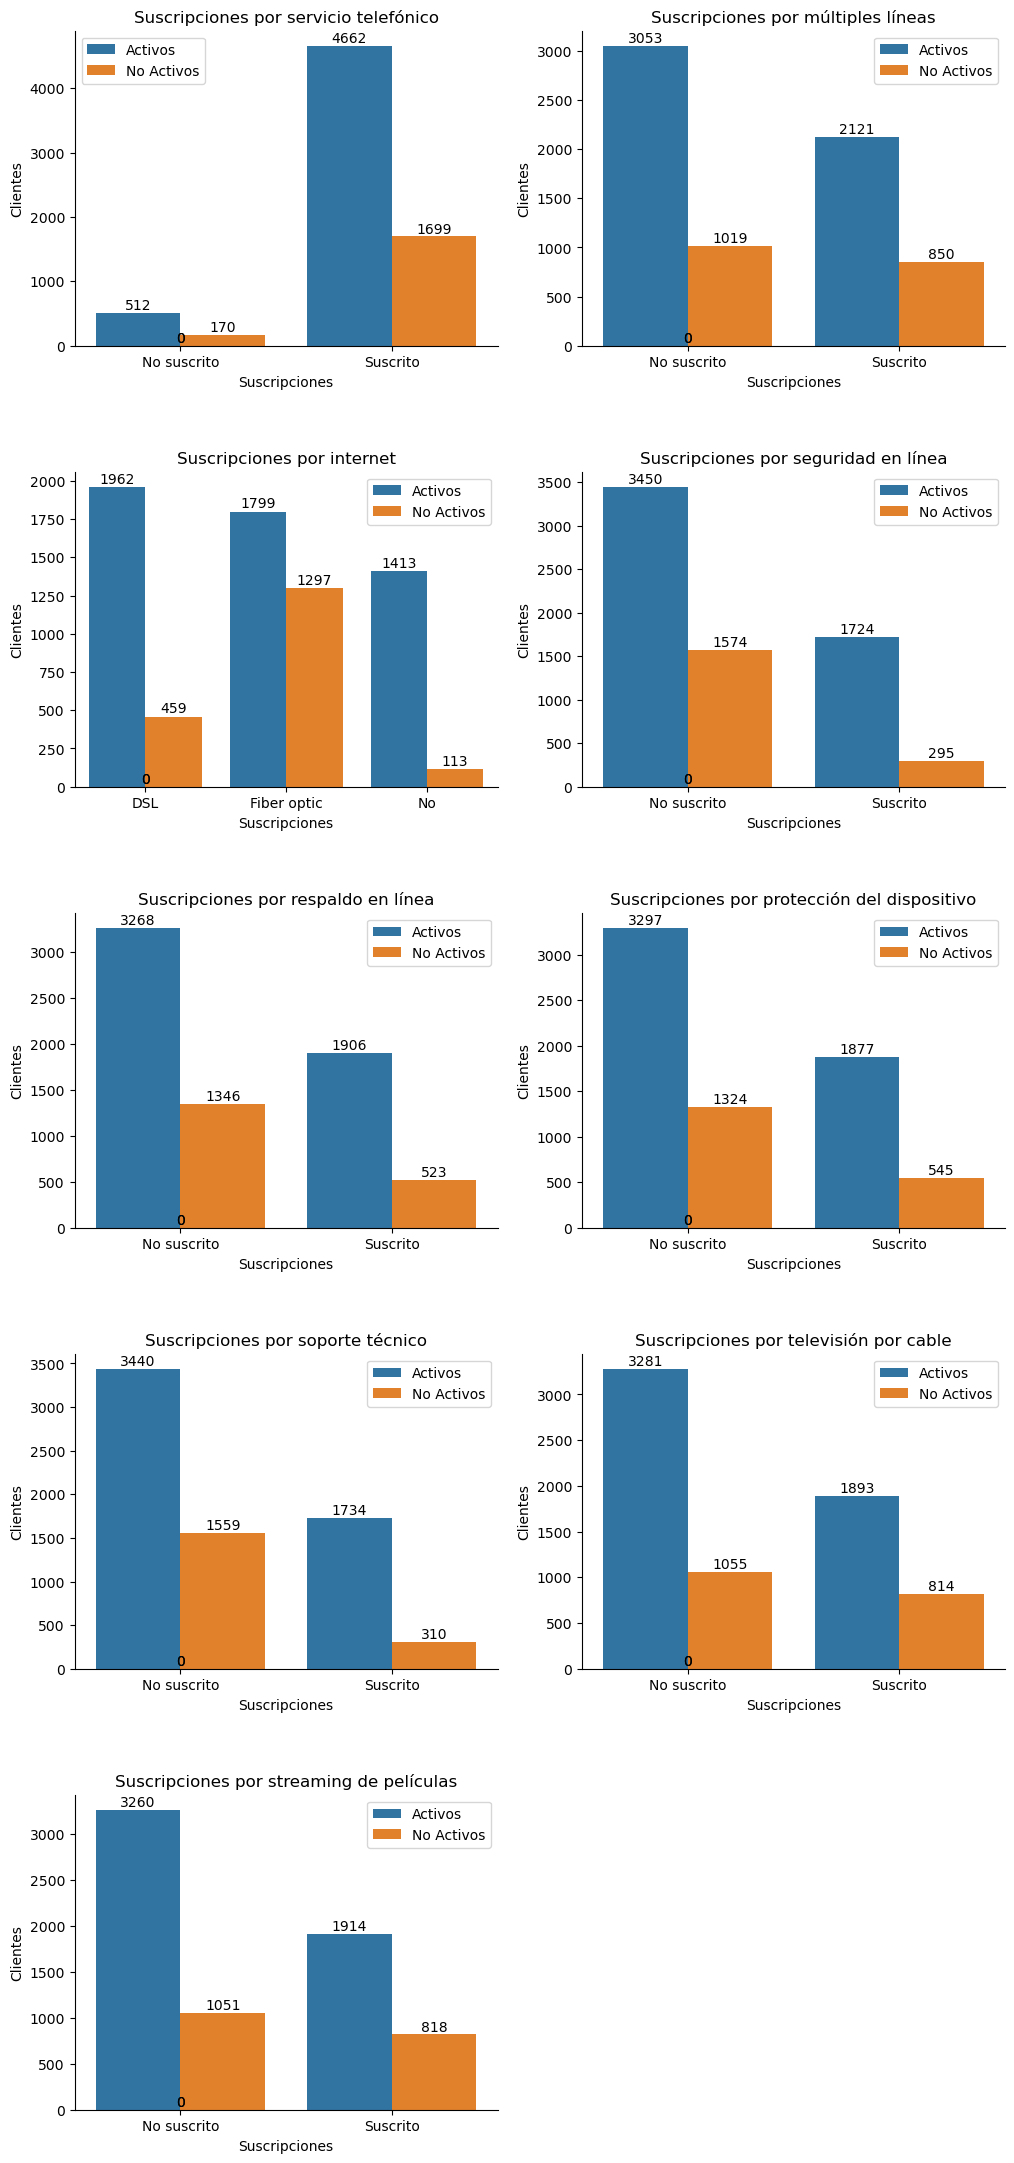

In [38]:
fig, axs = plt.subplots(5, 2, figsize=(12, 27))
plt.subplots_adjust(hspace=0.4)

# Lista de columnas y títulos
columnas_suscripciones = [
    ('Phone_Service', 'Suscripciones por servicio telefónico'),
    ('Multiple_Lines', 'Suscripciones por múltiples líneas'),
    ('Internet_Service', 'Suscripciones por internet'),
    ('Online_Security', 'Suscripciones por seguridad en línea'),
    ('Online_Backup', 'Suscripciones por respaldo en línea'),
    ('Device_Protection', 'Suscripciones por protección del dispositivo'),
    ('Tech_Support', 'Suscripciones por soporte técnico'),
    ('Streaming_TV', 'Suscripciones por televisión por cable'),
    ('Streaming_Movies', 'Suscripciones por streaming de películas')
]

# Graficar usando for loop
for i, (columna, titulo) in enumerate(columnas_suscripciones):
    fila = i // 2
    col = i % 2
    
    sns.countplot(data=df_suscription, x=columna, hue='Churn', ax=axs[fila][col])
    axs[fila][col].set_title(titulo)
    axs[fila][col].set_xlabel('Suscripciones')
    axs[fila][col].set_ylabel('Clientes')
    axs[fila][col].legend(labels=labels)
    
    # Cambiar etiquetas del eje x si los valores son 0 y 1
    unique_values = df_suscription[columna].unique()
    if set(unique_values) == {0, 1}:
        axs[fila][col].set_xticks([0, 1])
        axs[fila][col].set_xticklabels(['No suscrito', 'Suscrito'])
    
    # Agregar totales en cada barra
    for p in axs[fila][col].patches:
        axs[fila][col].text(p.get_x() + p.get_width()/2., p.get_height() + 5, 
                           str(int(p.get_height())), 
                           ha='center', va='bottom')
    
    # Remover líneas superiores y derechas
    sns.despine(ax=axs[fila][col])

# Ocultar el último subplot vacío
axs[4][1].axis('off')

plt.show()

**Conteo de evasión por variables numéricas**

Análisis por variables numéricas para el comportamiento si son usuarios activos o no activos

In [39]:
df.columns

Index(['Customer_ID', 'Churn', 'Gender', 'Senior_Citizen', 'Partner',
       'Dependents', 'Tenure', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Contract', 'Paperless_Billings', 'Payment_Method', 'Charges_Monthly',
       'Charges_Total', 'Charges_Daily'],
      dtype='object')

- Por meses de contrato del cliente (Ternure)

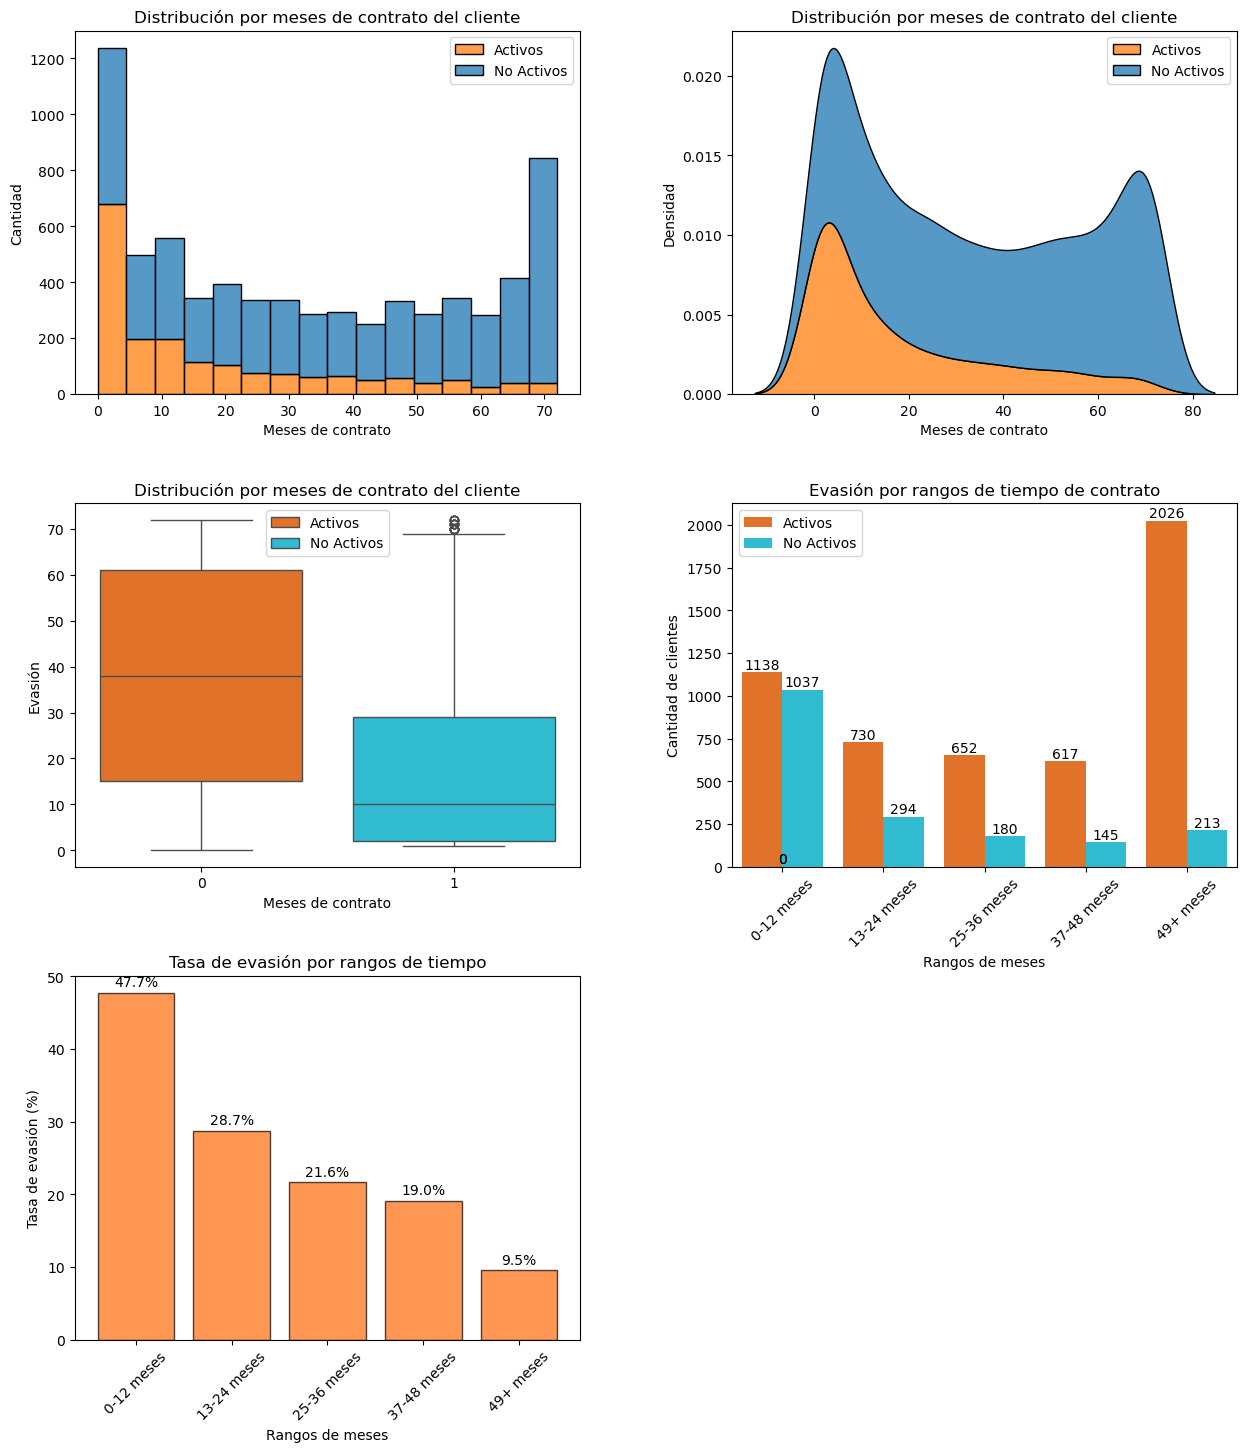

In [40]:
fig, axs = plt.subplots(3, 2, figsize=(15, 17))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Gráfico de distribución por meses de contrato del cliente (Ternure)
sns.histplot(data=df, x='Tenure', hue='Churn', multiple='stack', ax=axs[0,0])
axs[0,0].set_title('Distribución por meses de contrato del cliente')
axs[0,0].set_xlabel('Meses de contrato')
axs[0,0].set_ylabel('Cantidad')
axs[0,0].legend(labels=labels)

# Gráfico de densidad por meses de contrato del cliente (Ternure)
sns.kdeplot(data=df, x='Tenure', hue='Churn', multiple='stack', ax=axs[0,1], fill=True)
axs[0,1].set_title('Distribución por meses de contrato del cliente')
axs[0,1].set_xlabel('Meses de contrato')
axs[0,1].set_ylabel('Densidad')
axs[0,1].legend(labels=labels)

# Gráfico boxplot por meses de contrato del cliente (Ternure)
sns.boxplot(data=df, x='Churn', y='Tenure', hue='Churn', ax=axs[1,0], palette=co)
axs[1,0].set_title('Distribución por meses de contrato del cliente')
axs[1,0].set_xlabel('Meses de contrato')
axs[1,0].set_ylabel('Evasión')
axs[1,0].legend(labels=labels)

# Crear rangos de tenure
df['Tenure_Range'] = pd.cut(df['Tenure'], 
                           bins=[0, 12, 24, 36, 48, 72], 
                           labels=['0-12 meses', '13-24 meses', '25-36 meses', '37-48 meses', '49+ meses'])

sns.countplot(data=df, x='Tenure_Range', hue='Churn', ax=axs[1,1], palette=co)
axs[1,1].set_title('Evasión por rangos de tiempo de contrato')
axs[1,1].set_xlabel('Rangos de meses')
axs[1,1].set_ylabel('Cantidad de clientes')
axs[1,1].legend(labels=labels)
axs[1,1].tick_params(axis='x', rotation=45)

# Agregar totales
for p in axs[1,1].patches:
    axs[1,1].text(p.get_x() + p.get_width()/2., p.get_height() + 2, 
                 str(int(p.get_height())), 
                 ha='center', va='bottom')

# Tasa de churn por rangos de tenure
churn_by_tenure = df.groupby('Tenure_Range', observed=False)['Churn'].agg(['count', 'sum']).reset_index()
churn_by_tenure['churn_rate'] = (churn_by_tenure['sum'] / churn_by_tenure['count']) * 100

bars = axs[2,0].bar(churn_by_tenure['Tenure_Range'], churn_by_tenure['churn_rate'], 
                   color='#FF6B0B', alpha=0.7, edgecolor='black')
axs[2,0].set_title('Tasa de evasión por rangos de tiempo')
axs[2,0].set_xlabel('Rangos de meses')
axs[2,0].set_ylabel('Tasa de evasión (%)')
axs[2,0].tick_params(axis='x', rotation=45)

# Agregar porcentajes en las barras
for bar, rate in zip(bars, churn_by_tenure['churn_rate']):
    axs[2,0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5, 
                 f'{rate:.1f}%', ha='center', va='bottom')

axs[2,1].axis('off')  # Ocultar el último subplot vacío

plt.show()

- Cargos (darios, meses y total)

In [41]:
# Lista de columnas y títulos
columnas_numericas = [
    ('Charges_Monthly', 'Cargos Mensuales'),
    ('Charges_Total', 'Cargos Totales'),
    ('Charges_Daily', 'Cargos Diarios'),
]

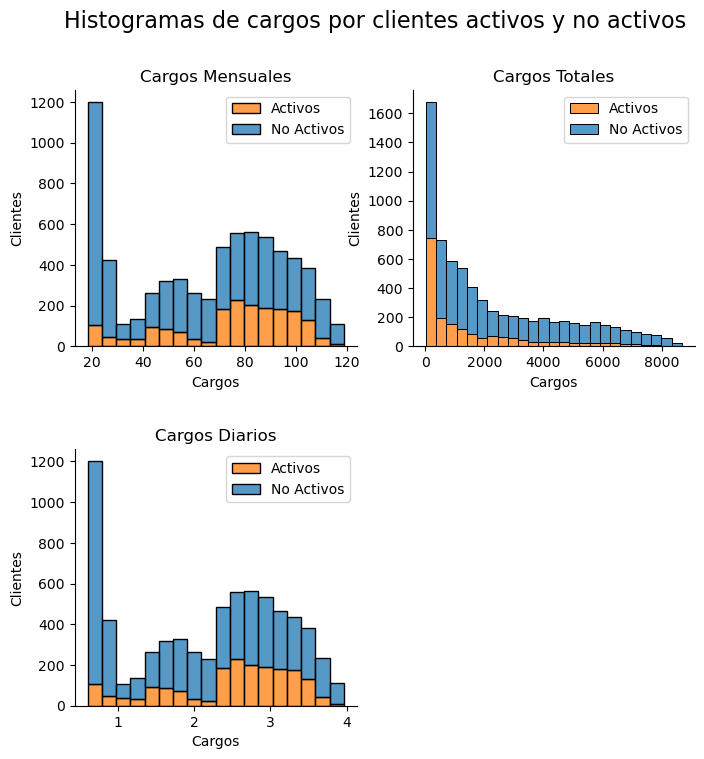

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Histogramas de cargos por clientes activos y no activos', fontsize=16)

# Graficar usando for loop
for i, (columna, titulo) in enumerate(columnas_numericas):
    fila = i // 2
    col = i % 2
    
    sns.histplot(data=df, x=columna, hue='Churn', multiple='stack', ax=axs[fila][col])
    axs[fila][col].set_title(titulo)
    axs[fila][col].set_xlabel('Cargos')
    axs[fila][col].set_ylabel('Clientes')
    axs[fila][col].legend(labels=labels)
    
    # Remover líneas superiores y derechas
    sns.despine(ax=axs[fila][col])

# Ocultar el último subplot vacío
axs[1][1].axis('off')

plt.show()

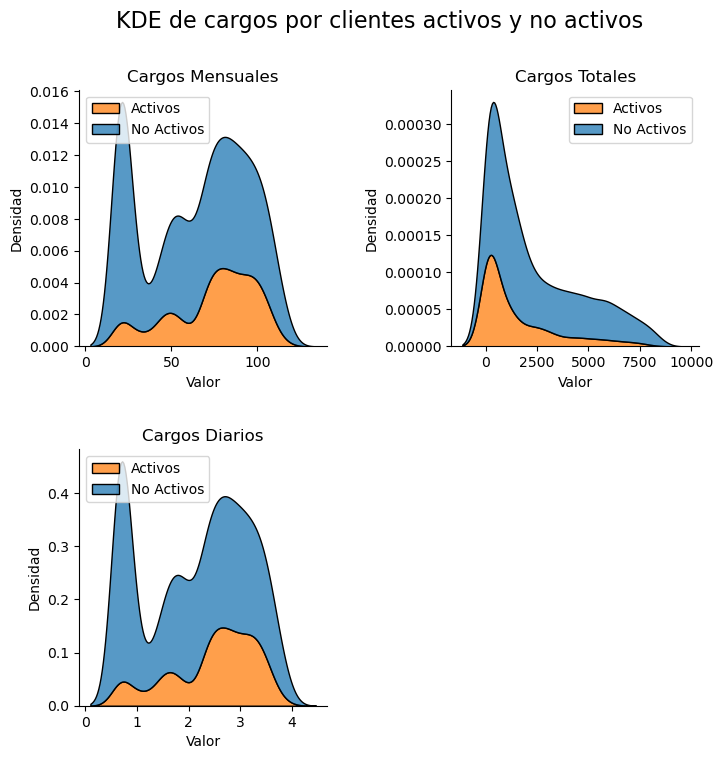

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.suptitle('KDE de cargos por clientes activos y no activos', fontsize=16)

# Gráficaas KDE con Churn respecto a columnas numéricas
for i, (columna, titulo) in enumerate(columnas_numericas):
    fila = i // 2
    col = i % 2

    sns.kdeplot(data=df, x=columna, hue='Churn', multiple='stack', ax=axs[fila][col], fill=True)
    axs[fila][col].set_title(titulo)
    axs[fila][col].set_xlabel('Valor')
    axs[fila][col].set_ylabel('Densidad')
    axs[fila][col].legend(labels=labels)

     # Remover líneas superiores y derechas
    sns.despine(ax=axs[fila][col])
    
# Ocultar el último subplot vacío
axs[1][1].axis('off')

plt.show()

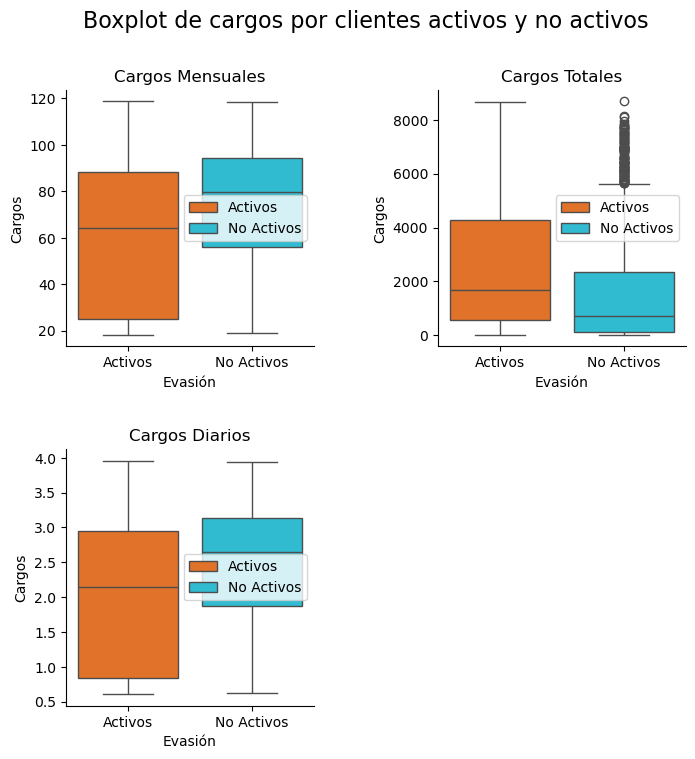

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.suptitle('Boxplot de cargos por clientes activos y no activos', fontsize=16)

for i, (columna, titulo) in enumerate(columnas_numericas):
    fila = i // 2
    col = i % 2

    sns.boxplot(data=df, x='Churn', y=columna, hue='Churn', ax=axs[fila][col], palette=co)
    axs[fila][col].set_title(titulo)
    axs[fila][col].set_xlabel('Evasión')
    axs[fila][col].set_ylabel('Cargos')
    axs[fila][col].legend(labels=labels)
    axs[fila][col].set_xticks([0, 1], labels=labels)

     # Remover líneas superiores y derechas
    sns.despine(ax=axs[fila][col])

axs[1][1].axis('off')  # Ocultar el último subplot vacío
plt.show()

#📄Informe final